In [ ]:
# Writen by Horia-Gabriel Radu - 2021-2022
# for Third Year Project at University of Manchester

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
r = random.randint(0, 255)
g = random.randint(0, 255)
b = random.randint(0, 255)
a = random.randint(0, 255)

In [2]:
caffeWeightFile = "models/res10_300x300_ssd_iter_140000_fp16.caffemodel"
caffeConfigFile = "models/deploy.prototxt"
netFace = cv2.dnn.readNetFromCaffe(caffeConfigFile, caffeWeightFile)

# tensorflowWeightFile = "models/opencv_face_detector_uint8.pb"
# tensorflowConfigFile = "models/opencv_face_detector.pbtxt"
# netFace = cv2.dnn.readNetFromTensorflow(tensorflowWeightFile, tensorflowConfigFile)

In [18]:
# cam = cv2.VideoCapture(0)

cv2.namedWindow("test")

img_counter = 0

crops = 1

while True:
#     ret, frame = cam.read()
#     frame = np.flip(frame, 1)
#     if not ret:
#         print("failed to grab frame")
#         break
    frame = cv2.imread("/home/horia/Documents/third-year-project/code/detectFace/images/10.jpg")
    mx = max(frame.shape[0], frame.shape[1])
    if frame.shape[0] > frame.shape[1]:
        dif = frame.shape[0] - frame.shape[1]
        frame = cv2.copyMakeBorder(frame, 0, 0, dif//2, dif//2, 0)
    elif frame.shape[0] < frame.shape[1]:
        dif = frame.shape[1] - frame.shape[0]
        frame = cv2.copyMakeBorder(frame, dif//2, dif//2, 0, 0, 0)
    frameCopy = frame.copy()
    print(frame.shape)
    
    inputImgs = []
    croppedImgs = []
    tempImgs = []
    offsets = []
    sizes = []
    
    inputImgs.append(frame)
    offsets.append((0, 0))
    sizes.append((int(frame.shape[0]), int(frame.shape[1]), 0))
    croppedImgs.append(frame)
    
    P = 40//2
    depth = 3
    iteration = 0
    oNr = 0
    
    
    print("--ONE RUN--")
    while True:
#         print("iteration", iteration)
        if iteration == depth:
#             print("len input", len(inputImgs))
            break
#         print("len croppd imgs",len(croppedImgs))
        P=P//2
        for orgImg in croppedImgs:
            (h, w) = orgImg.shape[:2]
            centerX = w//2
            centerY = h//2

            topLeft     = orgImg[0:centerY+P, 0:centerX+P]
            topRight    = orgImg[0:centerY+P, centerX-P:w]
            bottomLeft  = orgImg[centerY-P:h, 0:centerX+P]
            bottomRight = orgImg[centerY-P:h, centerX-P:w]

            tempImgs.append(topLeft)
            tempImgs.append(topRight)
            tempImgs.append(bottomLeft)
            tempImgs.append(bottomRight)

            offsets.append((        0 + offsets[oNr][0], 0         + offsets[oNr][1]))
            offsets.append((        0 + offsets[oNr][0], centerX-P + offsets[oNr][1]))
            offsets.append((centerY-P + offsets[oNr][0], 0         + offsets[oNr][1]))
            offsets.append((centerY-P + offsets[oNr][0], centerX-P + offsets[oNr][1]))
            inputImgs.append(topLeft)
            inputImgs.append(topRight)
            inputImgs.append(bottomLeft)
            inputImgs.append(bottomRight)
            
            for _ in range(4):
                sizes.append((h, w, P))
            
#                 #topleft
#             cv2.line(frameCopy, (centerX+P + offsets[oNr][1], centerY+P + offsets[oNr][0]), (centerX+P + offsets[oNr][1], 0         + offsets[oNr][0]), (255, 0, 0), depth-iteration)
#             cv2.line(frameCopy, (centerX+P + offsets[oNr][1], centerY+P + offsets[oNr][0]), (0 + offsets[oNr][1]        , centerY+P + offsets[oNr][0]), (255, 0, 0), depth-iteration)
#                 #topright
#             cv2.line(frameCopy, (centerX-P + offsets[oNr][1], centerY+P + offsets[oNr][0]), (centerX-P + offsets[oNr][1], 0         + offsets[oNr][0]), (0, 255, 255), depth-iteration)
#             cv2.line(frameCopy, (centerX-P + offsets[oNr][1], centerY+P + offsets[oNr][0]), (w + offsets[oNr][1]        , centerY+P + offsets[oNr][0]), (0, 255, 255), depth-iteration)
#                 #bottomleft
#             cv2.line(frameCopy, (centerX+P + offsets[oNr][1], centerY-P + offsets[oNr][0]), (centerX+P + offsets[oNr][1], h         + offsets[oNr][0]), (255, 255, 0), depth-iteration)
#             cv2.line(frameCopy, (centerX+P + offsets[oNr][1], centerY-P + offsets[oNr][0]), (0 + offsets[oNr][1]        , centerY-P + offsets[oNr][0]), (255, 255, 0), depth-iteration)
#                 #bottomright
#             cv2.line(frameCopy, (centerX-P + offsets[oNr][1], centerY-P + offsets[oNr][0]), (centerX-P + offsets[oNr][1], h         + offsets[oNr][0]), (255, 0, 255), depth-iteration)
#             cv2.line(frameCopy, (centerX-P + offsets[oNr][1], centerY-P + offsets[oNr][0]), (w + offsets[oNr][1]        , centerY-P + offsets[oNr][0]), (255, 0, 255), depth-iteration)
#                 #main axes
#             cv2.line(frameCopy, (w//2 + offsets[oNr][1], 0    + offsets[oNr][0]), (w//2 + offsets[oNr][1], h    + offsets[oNr][0]), (0, 0, 255), 2)
#             cv2.line(frameCopy, (0    + offsets[oNr][1], h//2 + offsets[oNr][0]), (w    + offsets[oNr][1], h//2 + offsets[oNr][0]), (0, 0, 255), 2)
            oNr+=1
            
        iteration+=1
        croppedImgs = tempImgs.copy()
        tempImgs = []

    inputBlob = cv2.dnn.blobFromImages(inputImgs, 1.0, (300, 300), (104.0, 177.0, 123.0), False, False);
    
    netFace.setInput(inputBlob, "data")
    detections = netFace.forward("detection_out")
    print(inputBlob.shape)
    print(detections.shape)

    boxes = []
    scores = []
    offset_y,offset_x = 0,0
    print(detections[0,0].shape)
    for i in range(0, detections.shape[2]):
        
        confidence = detections[0, 0, i, 2]
        offset_y,offset_x = offsets[int(detections[0, 0, i, 0])]

        if confidence < 0.7:
            continue
        if detections[0, 0, i, 3] > 1.0 or detections[0, 0, i, 3] < 0.0 or detections[0, 0, i, 4] > 1.0 or detections[0, 0, i, 4] < 0.0 or detections[0, 0, i, 5] > 1.0 or detections[0, 0, i, 5] < 0.0 or detections[0, 0, i, 6] > 1.0 or detections[0, 0, i, 6] < 0.0:
            continue
        print(detections[0, 0, i])
        bnr = int(detections[0, 0, i, 0])
        if bnr == 0:
            box = detections[0, 0, i, 3:7] * np.array([sizes[0][1], sizes[0][0], sizes[0][1], sizes[0][0]])
            scores.append(float(confidence+5))
        elif bnr < 5:
            box = detections[0, 0, i, 3:7] * np.array([sizes[bnr][1]//2+sizes[bnr][2], sizes[bnr][0]//2+sizes[bnr][2], sizes[bnr][1]//2+sizes[bnr][2], sizes[bnr][0]//2+sizes[bnr][2]])
            scores.append(float(confidence+4))
        elif bnr < 21:
            box = detections[0, 0, i, 3:7] * np.array([sizes[bnr][1]//2+sizes[bnr][2], sizes[bnr][0]//2+sizes[bnr][2], sizes[bnr][1]//2+sizes[bnr][2], sizes[bnr][0]//2+sizes[bnr][2]])
            scores.append(float(confidence+3))
        elif bnr < 85:
            box = detections[0, 0, i, 3:7] * np.array([sizes[bnr][1]//2+sizes[bnr][2], sizes[bnr][0]//2+sizes[bnr][2], sizes[bnr][1]//2+sizes[bnr][2], sizes[bnr][0]//2+sizes[bnr][2]])
            scores.append(float(confidence+2))
        elif bnr < 341:
            box = detections[0, 0, i, 3:7] * np.array([sizes[bnr][1]//2+sizes[bnr][2], sizes[bnr][0]//2+sizes[bnr][2], sizes[bnr][1]//2+sizes[bnr][2], sizes[bnr][0]//2+sizes[bnr][2]])
            scores.append(float(confidence+1))
        else:
            box = detections[0, 0, i, 3:7] * np.array([sizes[bnr][1]//2+sizes[bnr][2], sizes[bnr][0]//2+sizes[bnr][2], sizes[bnr][1]//2+sizes[bnr][2], sizes[bnr][0]//2+sizes[bnr][2]])
            scores.append(float(confidence))
        (startX, startY, endX, endY) = box
        boxWidth = endX-startX
        boxHeight = endY-startY
        boxes.append([int(startX+offset_x), int(startY+offset_y), int(boxWidth), int(boxHeight)])
        #cv2.rectangle(frameCopy, (int(startX+offset_x), int(startY+offset_y)), (int(endX+offset_x), int(endY+offset_y)), (0, 255, 0), 1)
#         if bnr == 1:
#             cv2.rectangle(topLeft, (int(startX), int(startY)), (int(endX), int(endY)), (0, 255, 0), 2)
#         elif bnr == 2:
#             cv2.rectangle(topRight, (int(startX), int(startY)), (int(endX), int(endY)), (0, 255, 0), 2)
#         elif bnr == 3:
#             cv2.rectangle(bottomLeft, (int(startX), int(startY)), (int(endX), int(endY)), (0, 255, 0), 2)
#         elif bnr == 4:
#             cv2.rectangle(bottomRight, (int(startX), int(startY)), (int(endX), int(endY)), (0, 255, 0), 2)
    
# #     print(boxes)
# #     print(scores)
    indices = cv2.dnn.NMSBoxes(boxes, scores, 0.7, 0.1)

    for i in indices:
        i = i[0]
        box = boxes[i]
        x1 = box[0]
        y1 = box[1]
        x2 = box[2]
        y2 = box[3]
#         final_boxes.append(box)
#         left, top, right, bottom = refined_box(left, top, width, height)
        # draw_predict(frame, confidences[i], left, top, left + width,
        #              top + height)
        cv2.rectangle(frameCopy, (x1, y1), (x1+x2, y1+y2), (0, 255, 0), 2)
        
#     print(frameCopy.shape)
#     print(topLeft.shape)
#     print(topRight.shape)
#     print(bottomLeft.shape)
#     print(bottomRight.shape)
    
    cv2.imshow("test", frameCopy)
#     cv2.waitKey(0)
#     cv2.imshow("test", topLeft)
#     cv2.waitKey(0)
#     cv2.imshow("test", topRight)
#     cv2.waitKey(0)
#     cv2.imshow("test", bottomLeft)
#     cv2.waitKey(0)
#     cv2.imshow("test", bottomRight)
    cv2.waitKey(0)
    break

    k = cv2.waitKey(1)
    if k%256 == 27:
        break
    elif k%256 == 32:
        img_name = "opencv_frame_{}.png".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1
        
    

# cam.release()

cv2.destroyAllWindows()

print("DONE")

(1296, 1296, 3)
--ONE RUN--
(85, 3, 300, 300)
(1, 1, 17000, 7)
(17000, 7)
[2.         1.         0.9803459  0.24962205 0.6552639  0.3462484
 0.77150023]
[2.         1.         0.9725089  0.71990174 0.58500314 0.8102872
 0.7393007 ]
[7.         1.         0.99298877 0.59136266 0.32974395 0.6771248
 0.4502683 ]
[8.         1.         0.9753837  0.12620413 0.42689064 0.23354203
 0.5551789 ]
[8.        1.        0.9678698 0.698319  0.4076264 0.7889978 0.537886 ]
[11.          1.          0.99897635  0.49623278  0.32880026  0.6620577
  0.5439659 ]
[12.          1.          0.99840254  0.4372443   0.1816729   0.6278564
  0.471508  ]
[30.          1.          0.9998148   0.1989789   0.6476496   0.36498165
  0.89117664]
[30.          1.          0.99392396  0.58287156  0.8123692   0.67669594
  0.9396485 ]
[30.          1.          0.8605848   0.7337442   0.86817485  0.8760335
  0.99415547]
[33.          1.          0.9941636   0.74661684  0.6866536   0.8619652
  0.83585954]
[33.          1.   

In [60]:
frame = cv2.imread("/home/horia/Documents/third-year-project/code/detectFace/images/2.jpg")
(h, w) = frame.shape[:2]
bottomRight = frame[h//2-100:h, w//2-100:w]
print(bottomRight.shape)
cv2.imshow("test", bottomRight)
k = cv2.waitKey(0)
# bottomRight = cv2.resize(bottomRight, (300, 300))
# print(bottomRight.shape)
inputBlob = cv2.dnn.blobFromImage(bottomRight, 1.0, (150, 150), (104.0, 177.0, 123.0), False, False);
# inputBlob[0] = inputBlob[0].flip(1)
netFace.setInput(inputBlob)
detections = netFace.forward()
print(inputBlob.shape)
print(detections.shape)

offset_y,offset_x = 0,0
print(detections[0,0].shape)
for i in range(0, detections.shape[2]):

    confidence = detections[0, 0, i, 2]
    
    if confidence < 0.7:
        continue
    print(detections[0, 0, i])
    bnr = int(detections[0, 0, i, 0])
#         print(bnr)
#         print(sizes)
    box = detections[0, 0, i, 3:7] * np.array([bottomRight.shape[1], bottomRight.shape[0], bottomRight.shape[1], bottomRight.shape[0]])
    
    (startX, startY, endX, endY) = box
    print(int(startX), int(startY), int(endX), int(endY))
#     cv2.rectangle(frameCopy, (int(startX+offset_x), int(startY+offset_y)), (int(endX+offset_x), int(endY+offset_y)), (0, 255, 0), 2)
    cv2.rectangle(bottomRight, (int(startX), int(startY)), (int(endX), int(endY)), (0, 255, 0), 2)


# print(detections[0, 0, :, 3].min())
# print(detections[0, 0, :, 3].max())
# print(detections[0, 0, :, 4].min())
# print(detections[0, 0, :, 4].max())
# print(detections[0, 0, :, 5].min())
# print(detections[0, 0, :, 5].max())
# print(detections[0, 0, :, 6].min())
# print(detections[0, 0, :, 6].max())


# print(frameCopy.shape)
print(bottomRight.shape)
cv2.imshow("test", bottomRight)
cv2.waitKey(0)
cv2.destroyAllWindows()

(300, 300, 3)
(1, 3, 150, 150)
(1, 1, 200, 7)
(200, 7)
[ 0.          1.          0.9999809   0.02128157 -0.00305453  0.6268759
  0.77544045]
6 0 188 232
(300, 300, 3)


In [28]:
inputBlob[0] = np.flip(inputBlob[0], 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(150, 150, 3)


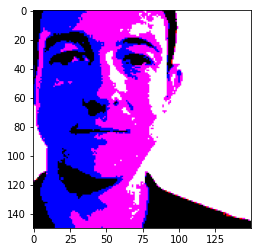

In [58]:
test = cv2.dnn.imagesFromBlob(inputBlob)
print(test[0].shape)
# blbTest = test[0][]
plt.imshow(test[0])

In [20]:
boxes=[]
scores=[]
width = int((detections[0, 0, 0, 5] - detections[0, 0, 0, 3])*w)
height = int((detections[0, 0,0, 6] - detections[0,0, 0, 4] )*h)
left = int(detections[0,0,0, 3] * w)
top = int(detections[0,0, 0, 4] * h)
boxes.append( [left, top, width, height])
boxes.append([left, top, width, height])
scores.append(float(detections[0,0, 0, 2]))
scores.append(float(detections[0,0, 0, 2]))
print(boxes)
print(scores)
print(np.array(boxes))
print(np.array(scores))

cv2.dnn.NMSBoxes(boxes, scores, 0.7, 0.5)

[[-4, 1, 210, 285], [-4, 1, 210, 285]]
[0.9939042925834656, 0.9939042925834656]
[[ -4   1 210 285]
 [ -4   1 210 285]]
[0.99390429 0.99390429]


array([[0]], dtype=int32)

In [21]:
inputBlobs = cv2.dnn.blobFromImages([frame, topLeft, topRight, bottomLeft, bottomRight], 1.0, (300, 300), (104.0, 177.0, 123.0))
inputBlob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300), (104.0, 177.0, 123.0))


NameError: name 'topLeft' is not defined

In [13]:
print(inputBlobs.shape)
print(inputBlob.shape)

(5, 3, 300, 300)
(1, 3, 300, 300)


In [14]:
netFace.setInput(inputBlobs, "data");
detectionsBatch = netFace.forward("detection_out");

netFace.setInput(inputBlob, "data");
detections = netFace.forward("detection_out");

error: OpenCV(4.5.3) /tmp/pip-req-build-afu9cjzs/opencv/modules/dnn/include/opencv2/dnn/shape_utils.hpp:170: error: (-215:Assertion failed) start <= (int)shape.size() && end <= (int)shape.size() && start <= end in function 'total'


In [9]:
print(detectionsBatch.shape)
print(detections.shape)

(1, 1, 1000, 7)
(1, 1, 200, 7)


In [10]:
print(detections[0][0][109])

[0. 0. 0. 0. 0. 0. 0.]
